In [1]:
SAMPLE_RATE = int(24e3)

from json import load

with open("mappa.json","r") as file_configurazione:
    mappa_conversione = load(file_configurazione)

Trasforma RAVDESS da formato per SER a formato comodo per EVC

In [19]:

with open("./eng/RAVDESS/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][0]["parametri"]["emozione"]["conversione"]
dataset = open("./eng/ravdess.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0].split("_")[-1]
    id_attore = corpo_utile.split("-")[mappa_conversione["datasets"][0]["parametri"]["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split("-")[mappa_conversione["datasets"][0]["parametri"]["emozione"]["posizione"]]]
    except KeyError:
        continue
    sesso = file.split("_")[mappa_conversione["datasets"][0]["parametri"]["sesso"]["posizione"]].lower()
    id_testo = corpo_utile.split("-")[mappa_conversione["datasets"][0]["parametri"]["testo"]["posizione"]]
    dataset.write(f"ravdess;en;./eng/RAVDESS/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()
    

Trasforma SAVEE da formato SER a formato per EVC

In [20]:
with open("./eng/SAVEE/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][1]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][1]["separatore"]
parametri = mappa_conversione["datasets"][1]["parametri"]
dataset = open("./eng/savee.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError:
        continue
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]][1:]
    dataset.write(f"savee;en;./eng/SAVEE/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma ECARINI da formato SER a formato comodo per EVC

In [21]:
with open("./ita/ECARINI/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][2]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][2]["separatore"]
parametri = mappa_conversione["datasets"][2]["parametri"]
dataset = open("./ita/ecarini.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError:
        continue
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]][3:]
    dataset.write(f"ecarini;it;./ita/ECARINI/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma ESD da formato Standard a formato comodo per EVC

In [22]:
import pandas as pd 
import os 
import codecs
emozioni = mappa_conversione["datasets"][3]["parametri"]["emozione"]["conversione"]
mappa_sesso = mappa_conversione["datasets"][3]["parametri"]["sesso"]
dataset = open("./ita/demos.csv","w")
dataset.write("dataset;lang;path;actor_id;emotion;statement_id\n")

dataframe = pd.DataFrame([], columns=["dataset","lang","path","actor_id","gender","emotion","statement_id"])
dataframe = dataframe.set_index("path")

# Recupero id degli statement, perché variano a seconda dell'emozione, ma a noi conviene renderli indipendenti
statement_recover = pd.read_csv(f"./eng/ESD/0015/0015.txt", sep="\t",names=["info","text","emotion"], encoding="utf-8")
statement_recover = statement_recover.dropna()
statement_recover["statement_id"]=statement_recover["info"].map(lambda txt_info: str(txt_info).split("_")[1])
statement_recover=statement_recover[statement_recover["emotion"]=="Neutral"][["statement_id","text"]]

for actor in os.listdir("./eng/ESD"):
    actor_take = pd.read_csv(f"./eng/ESD/{actor}/{actor}.txt", sep="\t",names=["info","text","emotion"], encoding="utf-8")
    actor_take = actor_take.dropna()
    actor_take["emotion"] = actor_take["emotion"].map(lambda emotion: emotion.strip())

    actor_take=actor_take.merge(statement_recover)
    actor_take["gender"] = mappa_sesso[actor]
    actor_take["dataset"]="esd"
    actor_take["lang"]="en"
    actor_take["actor_id"] = actor_take["info"].map(lambda txt_info: txt_info.split("_")[0])
    actor_take["emotion"] = actor_take["emotion"].map(lambda emotion: emozioni[emotion])
    actor_take["path"] = "./eng/ESD/"+actor+"/"+actor_take["emotion"]+"/"+actor_take["info"]+".wav"
    
    actor_take=actor_take.drop("info", axis=1)
    dataframe = pd.concat([dataframe,actor_take], axis=0)
    
dataframe.to_csv("./eng/esd.csv",sep=";",index=False,columns=["dataset","lang","path","actor_id","gender","emotion","statement_id"])
dataset.close()


Trasforma DEMOS da formato Standard a formato comodo per EVC

In [ ]:
# dataframe = pd.read_csv("./ita/DEMOS/file.txt", sep="_", names=["emotion","dataset","script","sex","boh","sex_2","speaker_id","info"])
# dataframe["track_id"] = dataframe["info"].map(lambda info: info[3:])
# dataframe["emotion"].value_counts()
# # emozioni = mappa_conversione["datasets"][2]["parametri"]["emozione"]["conversione"]
# # separatore = mappa_conversione["datasets"][2]["separatore"]
# # parametri = mappa_conversione["datasets"][2]["parametri"]
# # dataset = open("./ita/ecarini.csv","w")
# # dataset.write("dataset;lang;path;actor_id;emotion;statement_id\n")
# for file in files:
#     corpo_utile = file.split(".")[0]
#     id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
#     emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
#     id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]][3:]
#     dataset.write(f"ecarini;it;{file.strip()};{id_attore};{emozione};{id_testo}\n")
# dataset.close()

Trasforma EMOVO da formato Standard a formato comodo per EVC

In [23]:
with open("./ita/EMOVO/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][5]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][5]["separatore"]
parametri = mappa_conversione["datasets"][5]["parametri"]
dataset = open("./ita/emovo.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    corpo_utile = corpo_utile.replace("-","_")
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError as keyex:
        continue
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]]
    dataset.write(f"emovo;it;./ita/EMOVO/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma EMOITA da formato Standard a formato comodo per EVC

In [24]:
with open("./ita/EMOITA/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][6]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][6]["separatore"]
parametri = mappa_conversione["datasets"][6]["parametri"]
dataset = open("./ita/emoita.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    corpo_utile = corpo_utile.replace("-","_")
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError as keyex:
        continue
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]]
    dataset.write(f"emoita;it;./ita/EMOITA/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma CaFE da formato Standard a formato comodo per EVC

In [25]:
with open("./fr/CaFe/text.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()
    
mappa_sesso = mappa_conversione["datasets"][8]["parametri"]["sesso"]["conversione"]
emozioni = mappa_conversione["datasets"][8]["parametri"]["emozione"]["conversione"]
dataset = open("./fr/cafe.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.strip().split(".")[1].split("/")[-1].split("-")
    sesso = mappa_sesso[corpo_utile[0]]
    id_attore = f"{corpo_utile[0]}"
    try:
        emozione = emozioni[corpo_utile[1]]
    except KeyError:
        continue
    id_testo=corpo_utile[3]
    dataset.write(f"cafe;fr;./fr/CaFe/{file[2:].strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()


Statistiche datasets

Elaboro dataset ESD
Elaboro dataset RAVDESS
Elaboro dataset SAVEE
Elaboro dataset CaFe
Elaboro dataset ECARINI
Elaboro dataset EMOVO
sad          3834
anger        3831
happy        3828
surprised    3824
neutral      3733
disgust       526
fearful       526
Name: emotion, dtype: int64


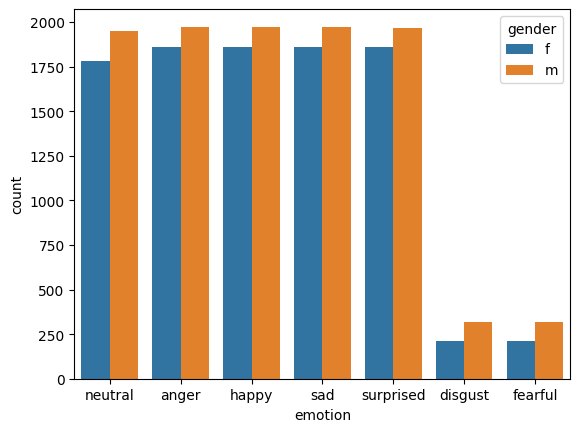

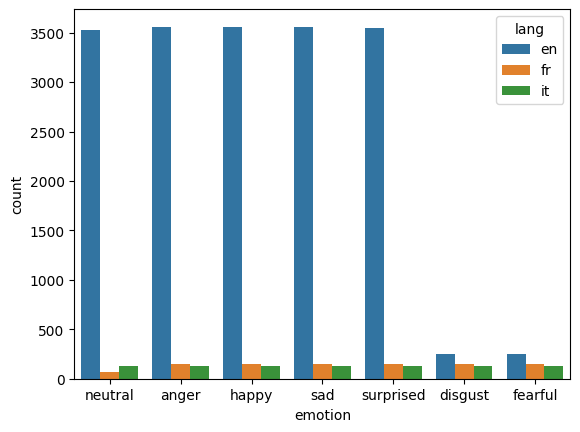

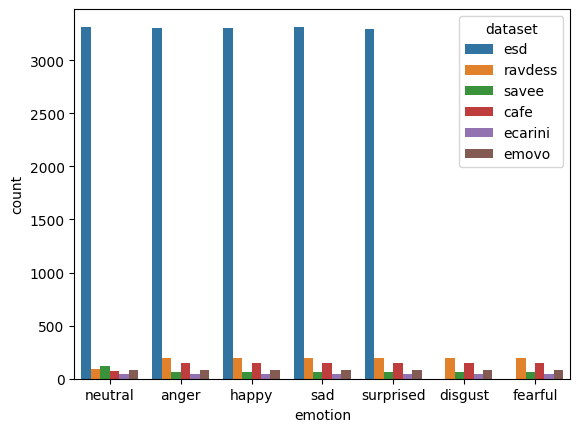

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datasets = {
    "ESD":"./dataset/eng/esd.csv",
    "RAVDESS":"./dataset/eng/ravdess.csv",
    "SAVEE": "./dataset/eng/savee.csv",
    "CaFe": "./dataset/fr/cafe.csv",
    "ECARINI":"./dataset/ita/ecarini.csv",
    "EMOVO":"./dataset/ita/emovo.csv", 
}

dataframe = pd.DataFrame([])
for dataset, path in datasets.items():
    print(f"Elaboro dataset {dataset}")
    dataframe = pd.concat([dataframe, pd.read_csv(path, sep=";")], axis=0)
    

print(dataframe['emotion'].value_counts())

mappa_emozione = {
    "sad":1,
    "anger":2,
    "happy":3,
    "neutral":4,
    "surprised":5,
    "fearful":6,
    "disgust":7,
    "calm":8
    
}

dataframe["emotion_id"] = dataframe['emotion'].map(lambda x: mappa_emozione[x])

dataframe["path"] = dataframe["path"].apply(lambda x: "./dataset"+x[1:])
dataframe["path"]

sns.countplot(data=dataframe, x="emotion", hue="gender")
plt.show()
sns.countplot(data=dataframe, x="emotion", hue="lang")
plt.show()
sns.countplot(data=dataframe, x="emotion", hue="dataset")
plt.show()
# dataframe.to_csv("./dataset.csv",sep=";",index=False,columns=["dataset","lang","path","actor_id","gender","emotion","statement_id"])




Analisi segnale 

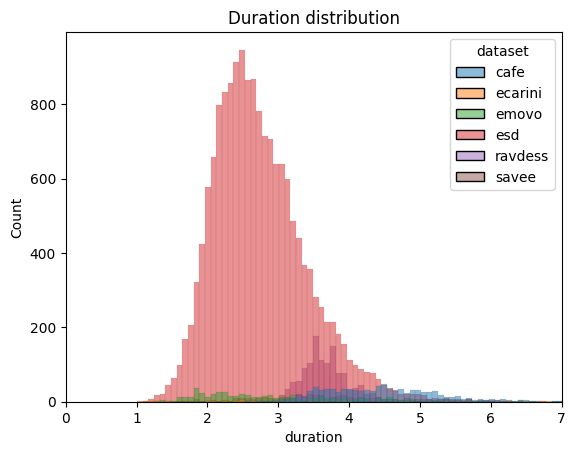

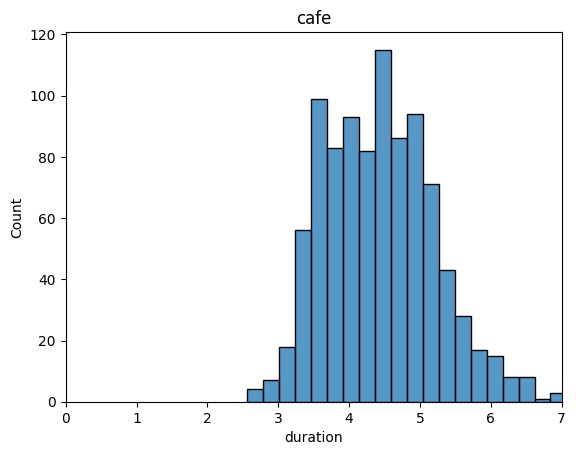

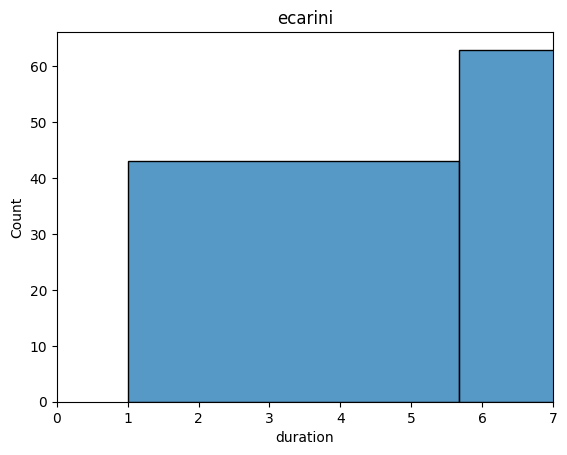

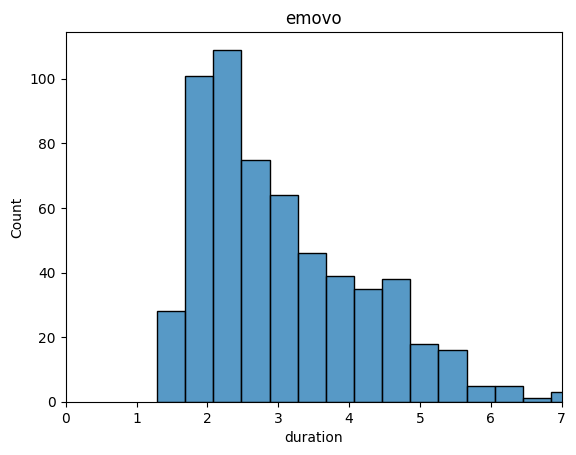

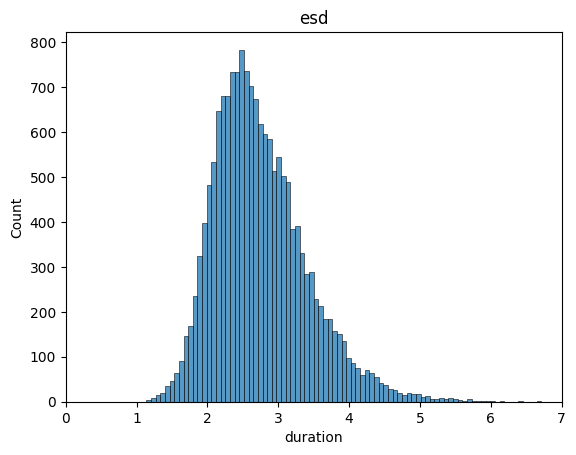

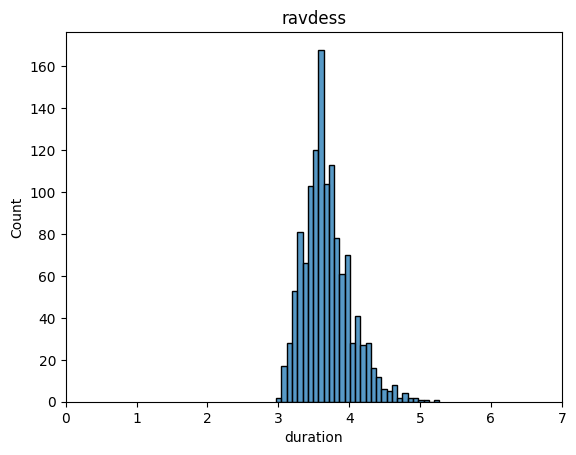

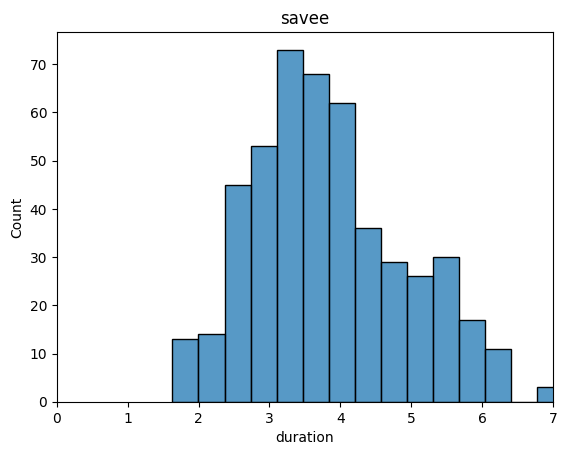

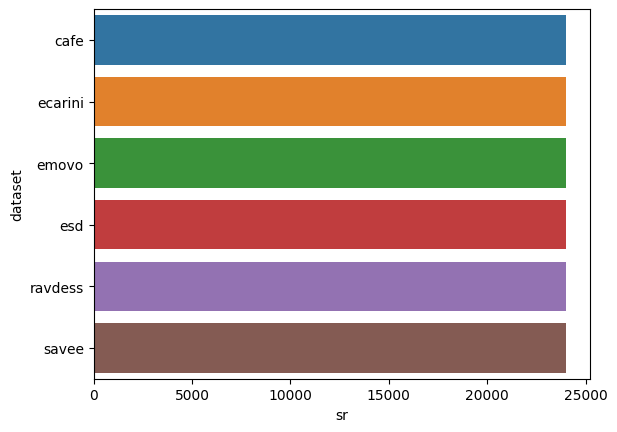

In [3]:
import soundfile as sf

from pydub import AudioSegment as am


infos=[]
nr_dataset = 0
for index, group in dataframe.groupby("dataset"):
    nr_dataset += 1
    for row_id,row in group.iterrows():
        audio = sf.SoundFile(row['path'])
        if audio.samplerate != SAMPLE_RATE:
            sound = am.from_file(row['path'], format='wav', frame_rate=audio.samplerate)
            sound = sound.set_frame_rate(SAMPLE_RATE)
            sound.export(row['path'], format='wav')
        audio = sf.SoundFile(row['path'])
        infos.append([group.dataset.iloc[0], audio.frames, audio.samplerate, audio.frames / audio.samplerate])

wav_info_dataset = pd.DataFrame(infos, columns=["dataset","samples","sr","duration"])

sns.histplot(data=wav_info_dataset, x="duration", hue="dataset")
plt.xlim(0,7)
plt.title("Duration distribution")
plt.show()

dataset_names = wav_info_dataset["dataset"].unique()
for axs_id, dataset in enumerate(dataset_names):
    plt.title(dataset)
    sns.histplot(data=wav_info_dataset[wav_info_dataset["dataset"] == dataset], x="duration")
    plt.xlim(0, 7)
    plt.show()
    
sns.barplot(data=wav_info_dataset, x="sr", y="dataset")
plt.show()

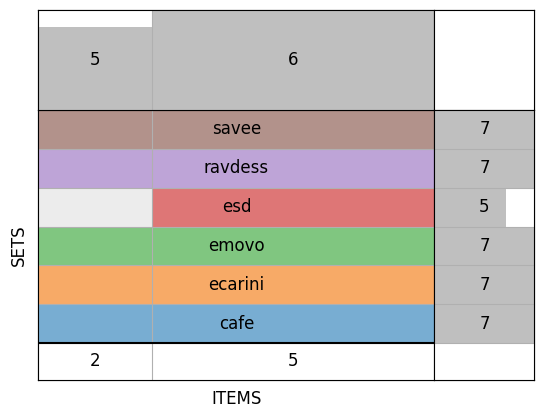

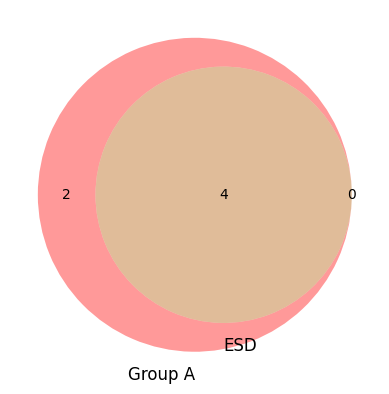

In [76]:
from supervenn import supervenn
from venn import venn
from matplotlib_venn import venn2
label = []
dataset=[]
for index, group in dataframe.groupby("dataset"):
    label.append(index)
    dataset.append(set(group.emotion.unique()))
supervenn(dataset,label)
plt.show()
# dataset={}
# for index, group in dataframe.groupby("dataset"):
#     label.append(index)
#     dataset[index]=set(map(lambda emotion: emotion[0].upper(),group.emotion.unique().tolist()))
# venn(dataset)

# Second way
venn2([set(['H', 'S', 'D', 'A', 'N', 'F']), set(['N', 'A', 'H', 'S'])], set_labels = ('Group A', 'ESD'))
plt.show()

In [ ]:

import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
signal, sr = librosa.load("/home/chopper/tesi/datasets/raw/ita/ECARINI/anger_ecarini_01_M_Il_colombre_par27.wav")
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title("Waveplot", fontdict=dict(size=18))
plt.xlabel("Time", fontdict=dict(size=15))
plt.ylabel("Amplitude", fontdict=dict(size=15))
plt.show()

plt.figure(figsize=(20, 5))
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512

mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sr, x_axis="time", y_axis="mel", cmap="magma", 
 hop_length=hop_length)
plt.colorbar(label="dB")
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()